In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from functools import reduce
from torch.nn import functional as F

In [8]:
n = 100 # resolution plot
k = 2 # dimension
a = 10 # limit for a->oo better approx

h = torch.linspace(-5, 5, n)
h0 = torch.stack(torch.meshgrid([h]*k),-1)
print("h:", h0.shape)

h: torch.Size([100, 100, 2])


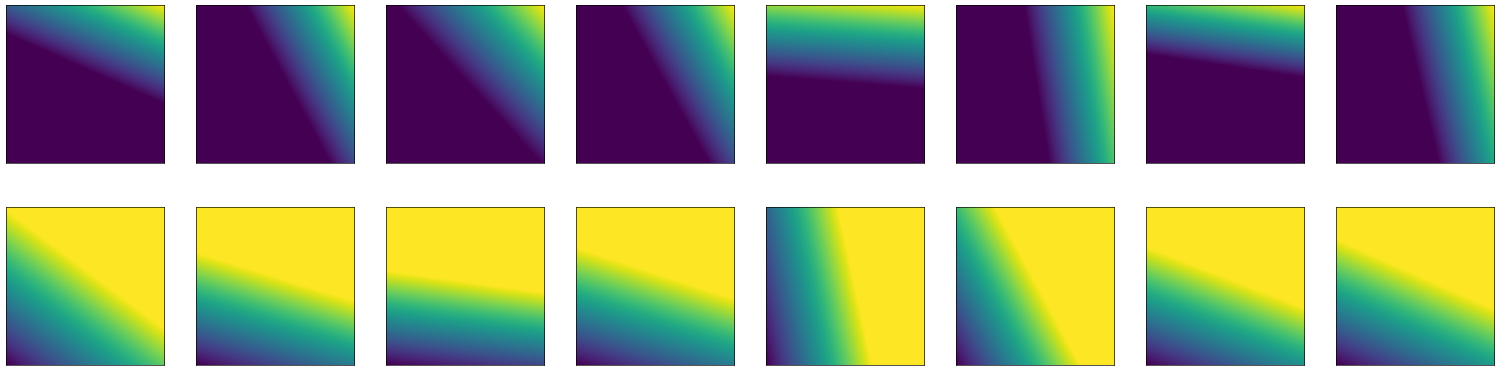

In [15]:
# layer 1
N1 = 256

# random planes (could be better)
w1p = a*torch.rand((N1, k)).abs()
w1n = a*torch.rand((N1, k)).abs()
b1p = -a*(torch.rand((N1)))
b1n = -a*(torch.rand((N1)))

h1p = torch.relu(F.linear(h0, w1p, b1p))
h1n = -torch.relu(-F.linear(h0, w1n, b1n))

# plot
max_show = 8
for h in (torch.concatenate([h1p[..., :max_show], h1n[..., :max_show]], -1),):
    plt.figure(figsize=(2*h.shape[-1], 8), dpi=60)
    for i in range(h.shape[-1]):
        plt.subplot(2, h.shape[-1]//2, i+1)
        plt.imshow(h[..., i], extent=(-5, 5, -5, 5), origin='lower')
        plt.xticks([]), plt.yticks([])
plt.savefig("l1.png", dpi=300, bbox_inches='tight')
plt.savefig("l1.pdf", dpi=300, bbox_inches='tight')
plt.show()

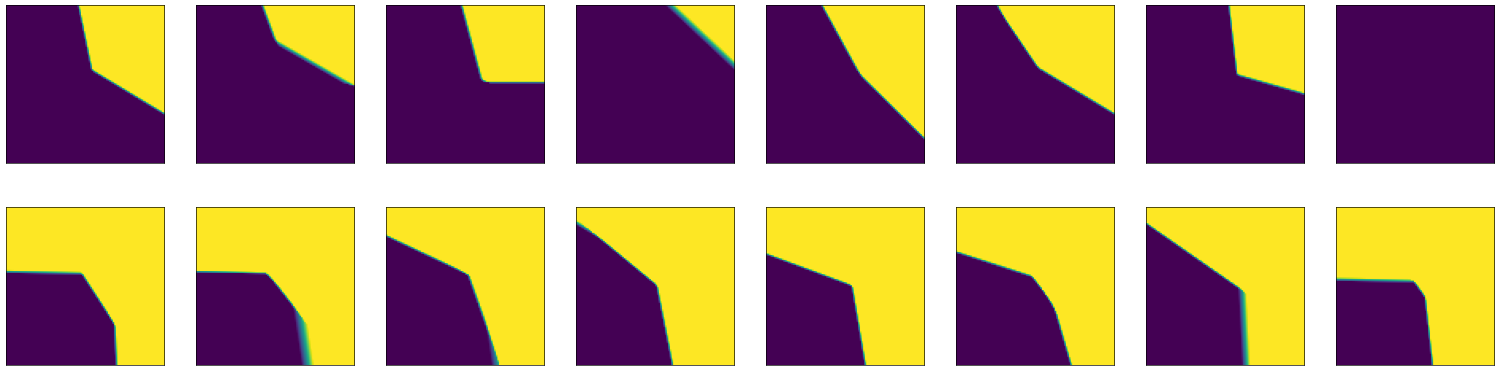

In [16]:
# layer 2
N2 = 256

# random planes (could be better)
w2p = (torch.rand((N2, h1n.shape[-1]))<0.02).float()
w2n = (torch.rand((N2, h1p.shape[-1]))<0.02).float()
b2p = +torch.ones(N2)
b2n = -torch.ones(N2)

h2p = torch.relu(F.linear(h1n, w2p, b2p))
h2n = -torch.relu(-F.linear(h1p, w2n, b2n))

# plot
max_show = 8
for h in (torch.concatenate([h2p[..., :max_show], h2n[..., :max_show]], -1),):
    plt.figure(figsize=(2*h.shape[-1], 8), dpi=60)
    for i in range(h.shape[-1]):
        plt.subplot(2, h.shape[-1]//2, i+1)
        plt.imshow(h[..., i], extent=(-5, 5, -5, 5), origin='lower')
        plt.xticks([]), plt.yticks([])
plt.savefig("l2.png", dpi=300, bbox_inches='tight')
plt.savefig("l2.pdf", dpi=300, bbox_inches='tight')
plt.show()

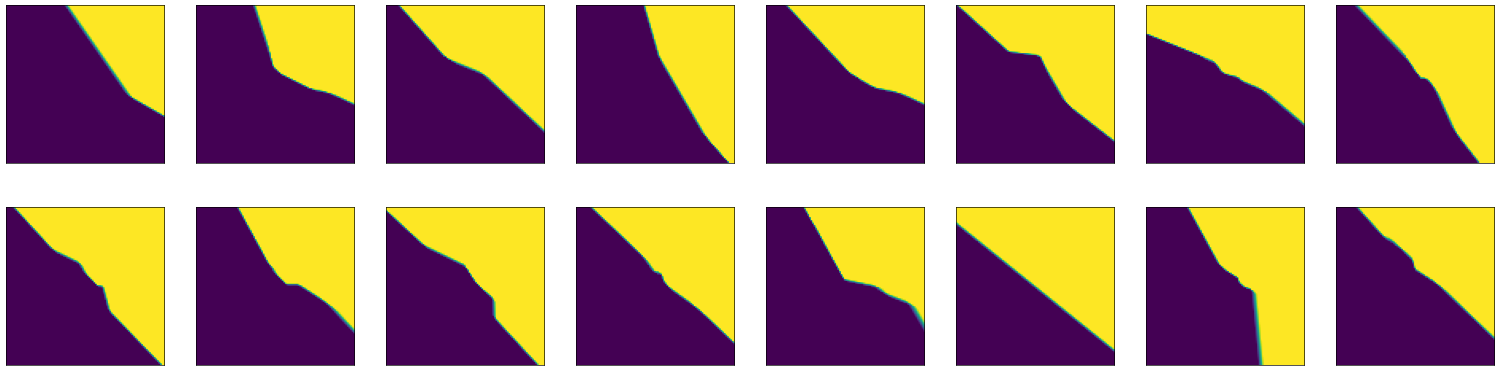

In [20]:
# layer 2
N3 = 256

# random planes (could be better)
w3p = (torch.rand((N3, h2n.shape[-1]))<0.05).float()
w3n = (torch.rand((N3, h2p.shape[-1]))<0.05).float()
b3p = +torch.ones(N3)
b3n = -torch.ones(N3)

h3p = torch.relu(F.linear(h2n, w3p, b3p))
h3n = -torch.relu(-F.linear(h2p, w3n, b3n))

max_show = 8
for h in (torch.concatenate([h3p[..., :max_show], h3n[..., :max_show]], -1),):
    plt.figure(figsize=(2*h.shape[-1], 8), dpi=60)
    for i in range(h.shape[-1]):
        plt.subplot(2, h.shape[-1]//2, i+1)
        plt.imshow(h[..., i], extent=(-5, 5, -5, 5), origin='lower')
        plt.xticks([]), plt.yticks([])
plt.savefig("l3.png", dpi=300, bbox_inches='tight')
plt.savefig("l3.pdf", dpi=300, bbox_inches='tight')
plt.show()